In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_nba = pd.read_csv(r'C:\Users\ersin\Desktop\fairfield uni\data mining\assignments\2\NBA_data.csv')

In [4]:
df_nba.head(5)

,TEAM,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT-MR,%PTS3PT,%PTSFBPS,%PTSFT,%PTSOFFTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Houston Rockets,82,65,17,48.2,49.8,50.2,41.6,5.4,40.9,10.2,17.5,15.5,36.2,47.0,53.0,68.9,31.1,55.7,44.3
1,Toronto Raptors,82,59,23,48.4,62.3,37.7,52.8,9.2,31.7,11.9,15.5,15.4,43.6,49.9,50.1,81.6,18.4,59.0,41.0
2,Golden State Warriors,82,58,24,48.1,66.1,33.9,55.5,16.7,29.9,17.0,14.6,15.2,38.9,64.3,35.7,80.1,19.9,68.5,31.5
3,Boston Celtics,82,55,27,48.3,64.3,35.7,51.6,13.4,33.0,9.1,15.3,14.8,38.3,49.0,51.0,81.3,18.7,58.6,41.4
4,Philadelphia 76ers,82,52,30,48.2,65.6,34.4,54.4,11.4,30.0,10.4,15.6,15.4,43.0,55.6,44.4,95.4,4.6,66.3,33.7


In [5]:
df_nba.columns


Index(['TEAM', 'GP', 'W', 'L', 'MIN', '%FGA2PT', '%FGA3PT', '%PTS2PT',
       '%PTS2PT-MR', '%PTS3PT', '%PTSFBPS', '%PTSFT', '%PTSOFFTO', '%PTSPITP',
       '2FGM%AST', '2FGM%UAST', '3FGM%AST', '3FGM%UAST', 'FGM%AST',
       'FGM%UAST'],
      dtype='object')

In [6]:
features = ['GP', 'W', 'L', 'MIN', '%FGA2PT', '%FGA3PT', '%PTS2PT', '%PTS2PT-MR',
       '%PTS3PT', '%PTSFBPS', '%PTSFT', '%PTSOFFTO', '%PTSPITP', '2FGM%AST',
       '2FGM%UAST', '3FGM%AST', '3FGM%UAST', 'FGM%AST', 'FGM%UAST']

In [7]:
x = df_nba.loc[:, features].values

In [8]:
x = StandardScaler().fit_transform(x)

In [9]:
x.shape

(30, 19)

In [10]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [11]:
normalised_nba = pd.DataFrame(x,columns=feat_cols)

In [12]:
normalised_nba.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18
25,0.0,-1.331485,1.331485,-1.135772,-0.106294,0.106294,0.076143,-0.437142,0.081789,0.373072,-0.463031,-0.306649,0.624791,0.411107,-0.411107,0.329509,-0.329509,0.469925,-0.469925
26,0.0,-1.414703,1.414703,-1.135772,-0.555725,0.555725,-0.651813,-0.051428,0.760465,-0.588754,-0.238983,1.644751,-0.836222,0.533218,-0.533218,0.635054,-0.635054,0.949621,-0.949621
27,0.0,-1.414703,1.414703,0.103252,-0.962352,0.962352,-0.827527,0.366428,1.308626,-0.719912,-1.284536,-0.957115,-1.584547,-0.175026,0.175026,-0.155768,0.155768,0.203427,-0.203427
28,0.0,-1.581139,1.581139,-1.135772,0.428743,-0.428743,0.151448,0.109285,-0.440269,0.853984,0.806569,1.644751,0.090274,0.288996,-0.288996,-0.317527,0.317527,-0.009772,0.009772
29,0.0,-1.664357,1.664357,-1.135772,0.364538,-0.364538,0.327162,-0.212142,-0.701298,1.072581,1.030616,-0.957115,0.696060,-0.761158,0.761158,-0.173741,0.173741,-0.889214,0.889214


In [13]:
pca_nba = PCA (n_components=2)
principalcom_nba = pca_nba.fit_transform(x)
nba_df_princ = pd.DataFrame(data = principalcom_nba
                            , columns = ['principal component 1', 'principal component 2'])
nba_df_princ.head(5)

,principal component 1,principal component 2
0,8.810785,0.159147
1,1.755251,0.810464
2,-0.862474,5.492170
3,1.956717,0.218086
4,-1.231460,4.039083


In [14]:
print('Explained variation per principal component: {}'.format(pca_nba.explained_variance_ratio_))


Explained variation per principal component: [0.30604679 0.25063498]


In [15]:
finalDf = pd.concat([nba_df_princ, df_nba[['TEAM']]], axis = 1)
finalDf

,principal component 1,principal component 2,TEAM
0,8.810785,0.159147,Houston Rockets
1,1.755251,0.810464,Toronto Raptors
2,-0.862474,5.492170,Golden State Warriors
3,1.956717,0.218086,Boston Celtics
4,-1.231460,4.039083,Philadelphia 76ers
5,2.354880,-0.096833,Cleveland Cavaliers
6,2.286958,-4.997076,Portland Trail Blazers
7,-2.051163,-2.356593,Indiana Pacers
8,-2.086889,2.445238,New Orleans Pelicans
9,0.805788,-2.257200,Oklahoma City Thunder


In [16]:
teams = ['Houston Rockets',
 'Toronto Raptors',
 'Golden State Warriors',
 'Boston Celtics',
 'Philadelphia 76ers',
 'Cleveland Cavaliers',
 'Portland Trail Blazers',
 'Indiana Pacers',
 'New Orleans Pelicans',
 'Oklahoma City Thunder',
 'Utah Jazz',
 'Minnesota Timberwolves',
 'San Antonio Spurs',
 'Denver Nuggets',
 'Miami Heat',
 'Milwaukee Bucks',
 'Washington Wizards',
 'LA Clippers',
 'Detroit Pistons',
 'Charlotte Hornets',
 'Los Angeles Lakers',
 'New York Knicks',
 'Brooklyn Nets',
 'Chicago Bulls',
 'Sacramento Kings',
 'Orlando Magic',
 'Atlanta Hawks',
 'Dallas Mavericks',
 'Memphis Grizzlies',
 'Phoenix Suns']

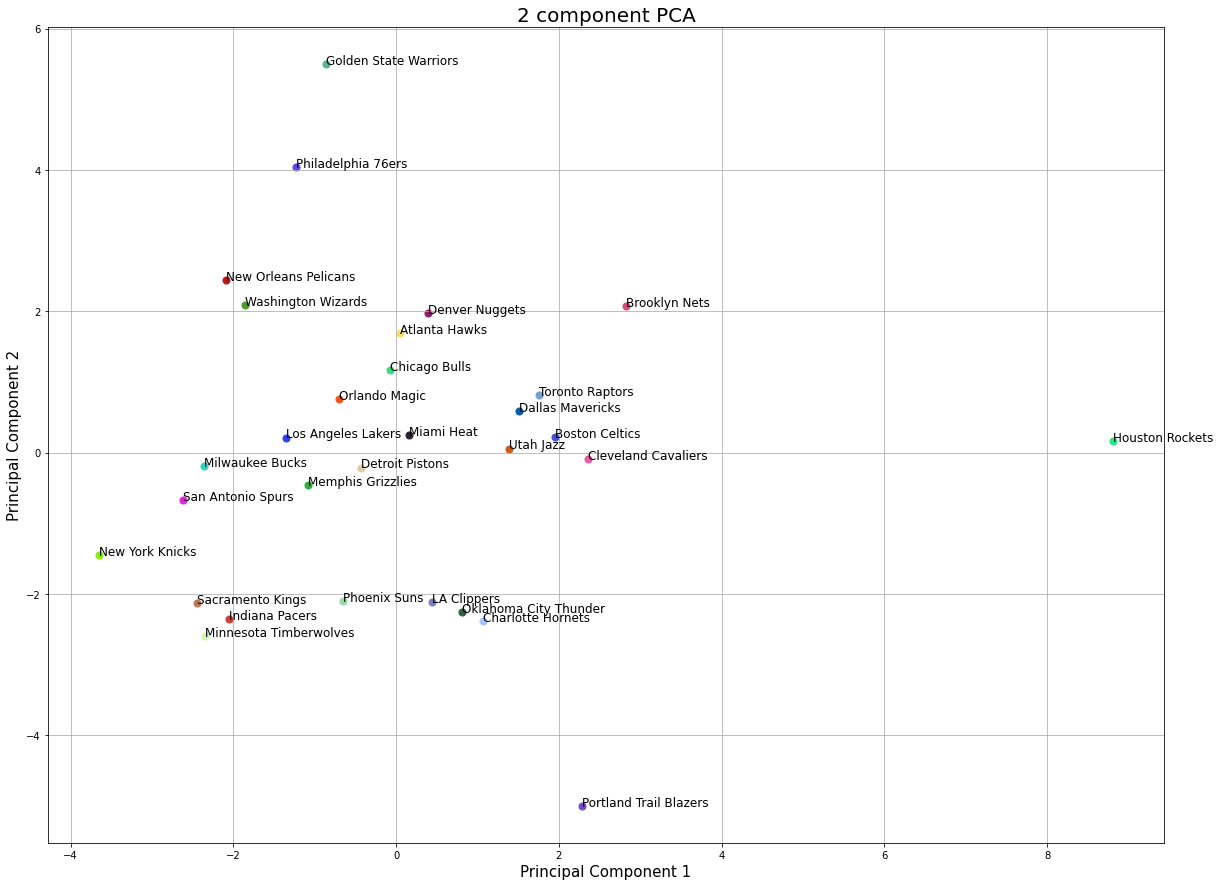

In [18]:
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

import random

number_of_colors = 30

colors1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

for team, color in zip(teams,colors1):
    indicesToKeep = finalDf['TEAM'] == team
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               
              )
    plt.annotate(team
                ,xy=(finalDf.loc[indicesToKeep, 'principal component 1']
                ,finalDf.loc[indicesToKeep, 'principal component 2'])
                ,ha= 'left'
                ,size=12
                
                )

ax.grid()